In [202]:
!pip install tensorflow

In [203]:
!pip3 install opencv-python

In [204]:
import tensorflow as tf
import tensorflow.keras.layers as L
import tensorflow.keras.models as Model
#import tensorflow.compat.v1.keras.backend as K
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#import keras_utils
import numpy as np
import cv2


In [205]:
def apply_gaussian_noise(X,sigma=0.1):
    noise = np.random.normal(loc=0, scale=sigma, size=X.shape)
    return X + noise

In [206]:
def apply_gaussian_noise_bottel(X,sigma=0.1):
    noise = np.random.normal(loc=0, scale=sigma, size=X.shape[0])
    return X + noise

In [207]:
def apply_gaussian_noise_bottelcnn(X,sigma=0.1):
    noise = np.random.normal(loc=0, scale=sigma, size=X.shape[1:])
    return X + noise

In [ ]:
import os


directory = 'cat'


file_names = os.listdir(directory)
img_rgb = []

for file_name in file_names:
    img = cv2.imread(directory+'/'+file_name,cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(120,120))
    img_rgb.append(img)

img_rgb[0].shape

(120, 120, 3)

In [209]:
X_train = np.array(img_rgb,dtype=np.float64)/255
X_train.shape

(101, 120, 120, 3)

In [210]:
def visualize_results(Denoised):
            noisy_images = apply_gaussian_noise(X_train)
            clean_images = X_train
            outputs = Denoised

            # Plot results
            plt.figure(figsize=(12, 4))
            for i in range(3):
                plt.subplot(3, 3, i*3+1)
                plt.imshow(noisy_images[i])
                plt.title("Noisy Image")
                plt.axis("off")

                plt.subplot(3, 3, i*3+2)
                plt.imshow(outputs[i])
                plt.title("Denoised Image")
                plt.axis("off")

                plt.subplot(3, 3, i*3+3)
                plt.imshow(clean_images[i])
                plt.title("Clean Image")
                plt.axis("off")

            plt.show()


In [211]:

class AutoencoderfC(tf.keras.Model):
    def __init__(self):
        super(AutoencoderfC, self).__init__()
        
        # Encoder part
        self.encoder = tf.keras.Sequential([
            L.Flatten(),
            L.Dense(128, activation='relu'),
            L.Dense(64, activation='relu'),
            L.Dense(32, activation='relu'),
        ])
        
        # Decoder part
        self.decoder = tf.keras.Sequential([
            L.Dense(32, activation='relu'),
            L.Dense(64, activation='relu'),
            L.Dense(128, activation='relu'),
            L.Dense(120 * 120 * 3, activation='sigmoid')  # Output layer
        ])
        
    def call(self, x):
        encoded = self.encoder(x)
        decoded_flat  = self.decoder(encoded)
        decoded = tf.reshape(decoded_flat, (-1, 120, 120, 3))
        return decoded

# Instantiate and build the model
autoencoder_model = AutoencoderfC()


In [212]:
autoencoder_model.compile(optimizer='adam',loss='mse')

In [213]:
X_train_noise = apply_gaussian_noise(X_train)

autoencoder_model.fit(x=X_train_noise, y=X_train, epochs=500)

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 225ms/step - loss: 0.0802
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - loss: 0.0830
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - loss: 0.0793
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - loss: 0.0761
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step - loss: 0.0761
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - loss: 0.0685
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - loss: 0.0643
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step - loss: 0.0594
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 215ms/step - loss: 0.0566
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 233ms/step - loss: 0.0595
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - loss: 0.0574
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - loss: 0.0557
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - loss: 0.0534
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - loss: 0.0575
Epoch 15/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - loss: 0.0564
Epoc

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.295478517876079..1.0181076484056981].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.341346622720728..1.403852946360064].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.2543472831364041..1.3199721644047464].


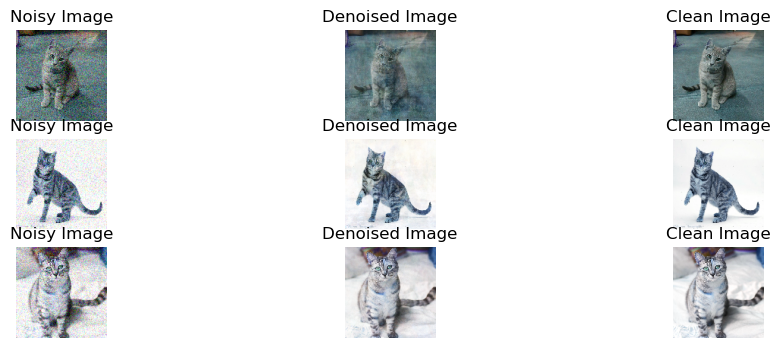

In [214]:
temp = autoencoder_model.encoder(X_train_noise).numpy()
testFc = autoencoder_model.decoder(temp).numpy()
testFcre = np.reshape(testFc,(-1,120,120,3))
visualize_results(testFcre)

In [215]:
class Autoencodernoise(tf.keras.Model):
    def __init__(self):
        super(Autoencodernoise, self).__init__()

        self.encoder = tf.keras.Sequential([
            L.Flatten(),
            L.Dense(128, activation='relu'),
            L.Dense(64, activation='relu'),
            L.Dense(32, activation='relu'),
        ])

        self.decoder = tf.keras.Sequential([
            L.Dense(32, activation='relu'),
            L.Dense(64, activation='relu'),
            L.Dense(128, activation='relu'),
            L.Dense(120 * 120 * 3, activation='sigmoid') 
        ])

    def call(self, x):
        encoded = self.encoder(x)
        print(encoded.shape)
        y = apply_gaussian_noise_bottel(encoded)
        decoded_flat  = self.decoder(y)
        decoded = tf.reshape(decoded_flat, (-1, 120, 120, 3))
        return decoded


autoencoder_model = Autoencodernoise()


In [216]:
autoencoder_model.compile(optimizer='adam',loss='mse')
autoencoder_model.fit(x=X_train, y=X_train, epochs=500)

Epoch 1/500
(None, 32)
(None, 32)
(None, 32)
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - loss: 0.0812
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - loss: 0.0832
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - loss: 0.0820
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - loss: 0.0814
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 183ms/step - loss: 0.0758
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - loss: 0.0701
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - loss: 0.0615
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step - loss: 0.0552
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - loss: 0.0549
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - loss: 0.0523
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - loss: 0.0575
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - loss: 0.0568
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - loss: 0.0530
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step - loss: 0.0528
Epoch 15/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.26272025228644574..1.1457978022426438].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.19873884870842906..1.3997681943649682].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1701012483794259..1.3084195565606302].


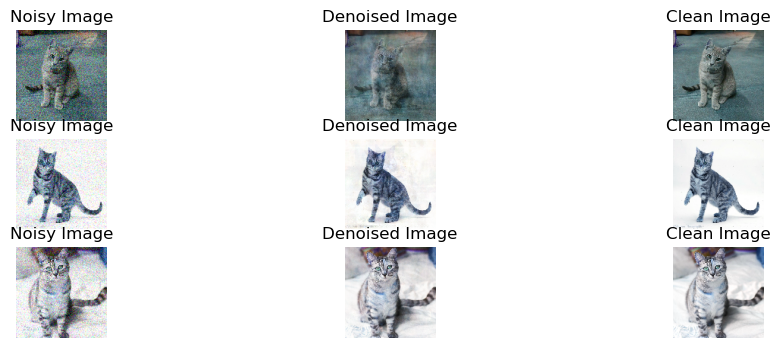

In [217]:
temp = autoencoder_model.encoder(X_train_noise).numpy()
testFcnoise = autoencoder_model.decoder(temp).numpy()
testFcrenoise = np.reshape(testFcnoise,(-1,120,120,3))
visualize_results(testFcrenoise)

In [226]:

class Autoencodercnn(tf.keras.Model):
    def __init__(self):
        super(Autoencodercnn, self).__init__()
        
        # Encoder part
        self.encoder = tf.keras.Sequential([
            L.Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same'),
            L.Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same'),
            L.Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'),
            L.Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'),
            L.MaxPooling2D(pool_size=(3, 3))
        ])
        
        # Decoder part
        self.decoder = tf.keras.Sequential([
            L.Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'),
            L.Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'),
            L.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
            L.Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same'),
            L.Conv2D(3, kernel_size=(3, 3), activation='relu', padding='same'),
            L.UpSampling2D(size=(3, 3)),  # Output layer
        ])
        
    def call(self, x):
        encoded = self.encoder(x)
        print(encoded.shape)
        decoded  = self.decoder(encoded)
        return decoded

# Instantiate and build the model
autoencoder_cnnmodel = Autoencodercnn()


In [227]:
autoencoder_cnnmodel.compile(optimizer='adam',loss=tf.keras.losses.MeanSquaredError())

In [229]:
X_train_noise = apply_gaussian_noise(X_train)

autoencoder_cnnmodel.fit(x=X_train_noise, y=X_train, epochs=50)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 65s 16s/step - loss: 0.0082
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step - loss: 0.0079
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 39s 9s/step - loss: 0.0084
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 35s 8s/step - loss: 0.0076
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 39s 9s/step - loss: 0.0081
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 10s/step - loss: 0.0081
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 35s 7s/step - loss: 0.0077
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 38s 9s/step - loss: 0.0077
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 9s/step - loss: 0.0076
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 43s 9s/step - loss: 0.0078
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 43s 9s/step - loss: 0.0080
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 8s/step - loss: 0.0074
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 37s 8s/step - loss: 0.0080
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 35s 8s/step - loss: 0.0071
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 9s/step - loss: 0.0074
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 32s 7s/ste

KeyboardInterrupt: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.24987162758353942..1.0596429782664711].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1846788628570495..1.3873193871688803].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.16380362..1.142261].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.21327306716498895..1.3604057044938034].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0892397..1.0925515].


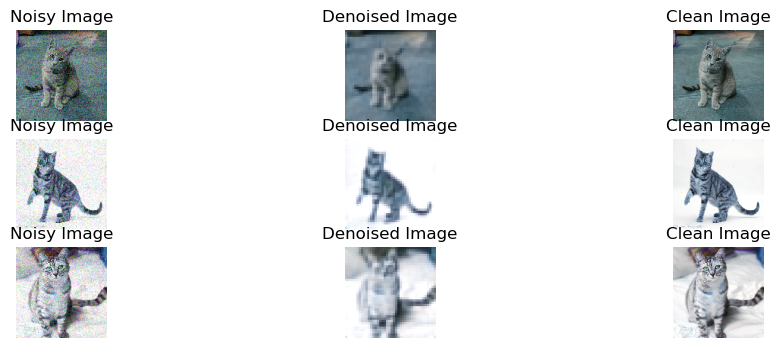

In [222]:
temp = autoencoder_cnnmodel.encoder(X_train_noise).numpy()
testcnn = autoencoder_cnnmodel.decoder(temp).numpy()
visualize_results(testcnn)

In [223]:
class Autoencodercnnnoise(tf.keras.Model):
    def __init__(self):
        super(Autoencodercnnnoise, self).__init__()
        
        # Encoder part
        self.encoder = tf.keras.Sequential([
            L.Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'),
            L.Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'),
            L.Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same'),
            L.Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same'),
            L.MaxPooling2D(pool_size=(3, 3))
        ])

        self.decoder = tf.keras.Sequential([
            L.Conv2D(32, kernel_size=(5, 5), activation='relu',padding='same'),
            L.Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same'),
            L.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
            L.Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'),
            L.Conv2D(3, kernel_size=(3, 3), activation='relu', padding='same'),
            L.UpSampling2D(size=(3, 3)),  
        ])
        
    def call(self, x):
        encoded = self.encoder(x)
        Y = apply_gaussian_noise_bottelcnn(encoded)
        decoded  = self.decoder(encoded)
        return decoded

autoencoder_cnnnoisemodel = Autoencodercnnnoise()


In [224]:
autoencoder_cnnnoisemodel.compile(optimizer='adam',loss=tf.keras.losses.MeanSquaredError())
autoencoder_cnnnoisemodel.fit(x=X_train, y=X_train, epochs=50)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 39s 7s/step - loss: 0.2194
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 33s 8s/step - loss: 0.0928
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 35s 7s/step - loss: 0.0665
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 39s 10s/step - loss: 0.0575
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 49s 11s/step - loss: 0.0344
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 47s 10s/step - loss: 0.0272
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 50s 12s/step - loss: 0.0229
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 47s 10s/step - loss: 0.0209
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 7s/step - loss: 0.0185
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 7s/step - loss: 0.0168
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 7s/step - loss: 0.0164
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 29s 6s/step - loss: 0.0160
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 7s/step - loss: 0.0155
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 7s/step - loss: 0.0137
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 7s/step - loss: 0.0139
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 7s/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.23855969409249989..1.0745117438442586].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.20342750193458958..1.3796723972547422].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.16380362..1.142261].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.23916689539217714..1.3278858996870273].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0892397..1.0925515].


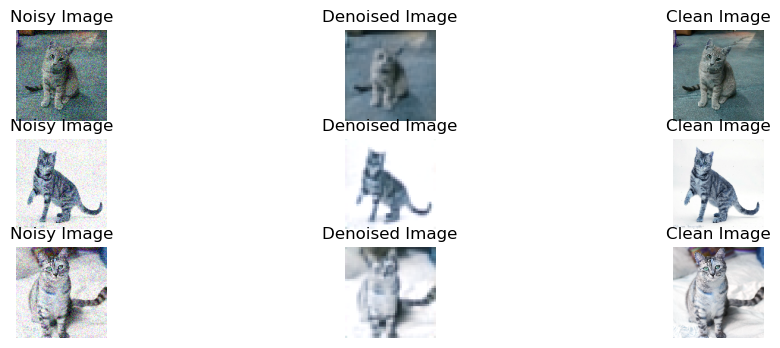

In [225]:
temp = autoencoder_cnnmodel.encoder(X_train_noise).numpy()
testcnnnoise = autoencoder_cnnmodel.decoder(temp).numpy()
visualize_results(testcnnnoise)